In [10]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
%pylab inline

D:\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Populating the interactive namespace from numpy and matplotlib


В приложенном файле — данные по ежемесячному уровню производства молока в фунтах на одну корову:

In [24]:
data = pd.read_csv('monthly-milk-production.csv', sep=';', index_col=['month'], parse_dates=['month'], dayfirst=True)
data.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


Загрузите ряд, создайте новый ряд значений среднего дневного уровня производства молока в фунтах на одну корову, поделив на число дней в месяце (вычисляется с помощью функции monthrange из пакета calendar). Постройте график полученного ряда

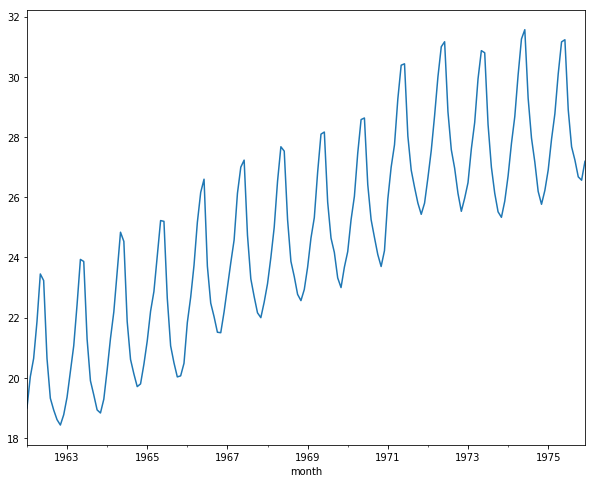

In [25]:
data['daily'] = data['milk'] / data.index.days_in_month
data['daily'].plot(figsize=(10, 8));

Для ряда со средним дневным количеством молока на корову из предыдущего вопроса давайте с помощью критерий Дики-Фуллера подберём порядок дифференцирования, при котором ряд становится стационарным.

Дифференцирование можно делать так:
```python
milk.daily_diff1 = milk.daily - milk.daily.shift(1)
```

Чтобы сделать сезонное дифференцирование, нужно изменить значение параметра у функции shift:
```python
milk.daily_diff12 = milk.daily - milk.daily.shift(12)
```

При дифференцировании длина ряда сокращается, поэтому в части строк в новой колонке значения будут не определены (NaN). Подавая полученные столбцы на вход критерию Дики-Фуллера, отрезайте неопределённые значения, иначе вы получите неопределённый достигаемый уровень значимости.

Итак, какое дифференцирование делает ряд стационарным?

In [13]:
print 'p-value = %f' % round(sm.tsa.stattools.adfuller(data['daily'])[1], 4)

p-value = 0.682200


In [58]:
data['daily_diff1'] = data['daily'] - data['daily'].shift(1)
print 'p-value = %f' % sm.tsa.stattools.adfuller(data['daily_diff1'].dropna())[1]

p-value = 0.064301


In [59]:
data['daily_diff12'] = data['daily'] - data['daily'].shift(12)
print 'p-value = %f' % sm.tsa.stattools.adfuller(data['daily_diff12'].dropna())[1]

p-value = 0.221277


In [67]:
data['daily_diff13'] = data['daily_diff12'] - data['daily_diff12'].shift(1)
print 'p-value = %f' % sm.tsa.stattools.adfuller(data['daily_diff13'].dropna())[1]

p-value = 0.000002


Для стационарного ряда из предыдущего вопроса (продифференцированного столько раз, сколько вы посчитали нужным) постройте график автокорреляционной функции. Это можно cделать так:
```python
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(ряд.values.squeeze(), lags=50)
```

Исходя из этого графика, какое начальное приближение вы предложили бы для параметра Q в модели SARIMA?

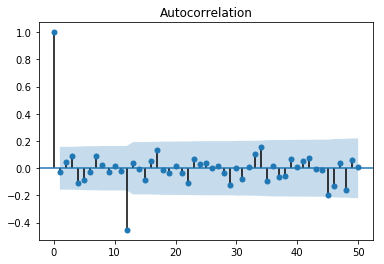

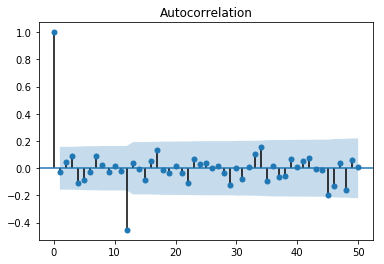

In [68]:
sm.graphics.tsa.plot_acf(data['daily_diff13'].dropna().values.squeeze(), lags=50)

Для того же ряда, что и в предыдущем вопросе, постройте график частичной автокорреляционной функции. Это можно сделать так:
```python
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(ряд.values.squeeze(), lags=50)
```

Исходя из этого графика, какое начальное приближение вы предложили бы для параметра p в модели SARIMA?

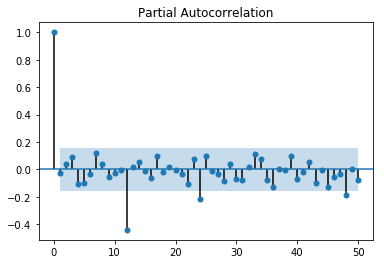

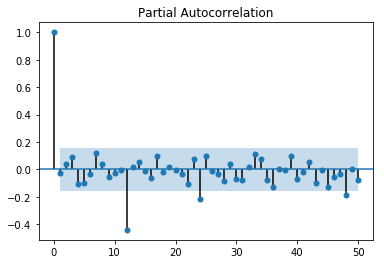

In [69]:
sm.graphics.tsa.plot_pacf(data['daily_diff13'].dropna().values.squeeze(), lags=50)